# Master Fig 4

In [1]:
library(ggplot2)
library(patchwork)

In [2]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14")

## Load Subfigs

In [9]:
peak_set_x_motif = readRDS("./subfigs/20201212_peaksets.rds")
pseudotime_expr_chromvar = readRDS("./subfigs/20201212_pseudotime_expr_motif.rds")
pseudotime_genes = readRDS("./subfigs/20201212_genes.rds")
naive_primed_vortex = readRDS("./subfigs/20201212_vortex.rds")

## Assemble Components

In [8]:
horizontal_spacers <- function(plot, widths=c(0,1,0)) {
    wrap_plots(plot_spacer(), plot, plot_spacer(), widths=widths)
}

vertical_spacers <- function(plot, heights=c(0,1,0)) {
    wrap_plots(plot_spacer(), plot, plot_spacer(), ncol=1, heights=heights)
}

placeholder_plot <- function(text, size=1) {
    df = data.frame(x=c(0), y=c(0), t=c(text))
    ggplot(df)+
    geom_text(aes(x=x,y=y,label=t), size=size)+
    theme_void()+
    theme(panel.border = element_rect(colour = "black", fill=NA, size=0.5),
                                                       plot.margin = unit(c(0,0,0,0), "pt"))
}

### Schematic + Peak Set x Motif

In [12]:
row1 = wrap_plots(placeholder_plot("BPNet SCHEMATIC", size=10),
                 peak_set_x_motif,
                 widths = c(12, 15))

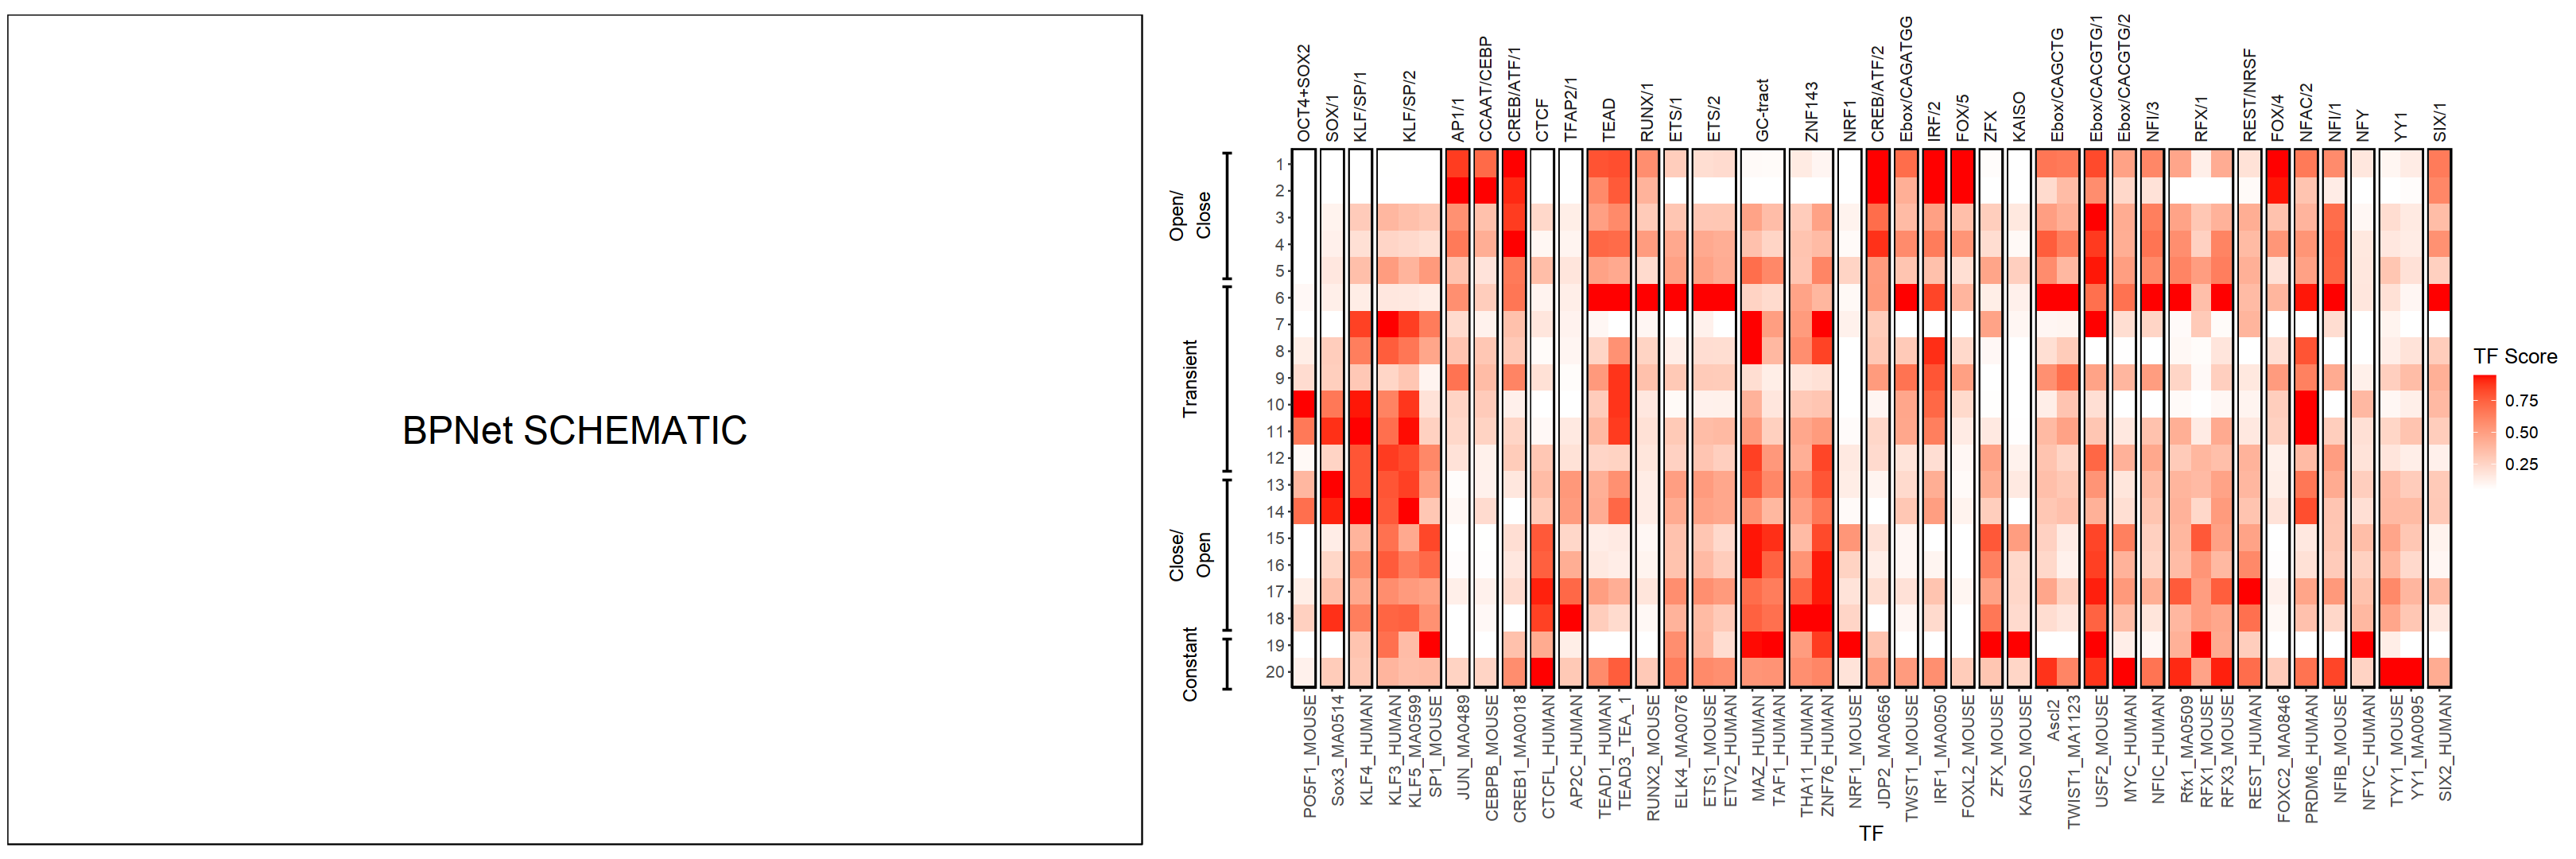

In [13]:
options(repr.plot.width = 27, repr.plot.height = 9)
row1

### Genes + Naive/Primed Vortex

In [24]:
row3 = wrap_plots(vertical_spacers(horizontal_spacers(pseudotime_genes)),
                 plot_spacer(),
                 naive_primed_vortex,
                 widths=c(20.5,0.5,6))

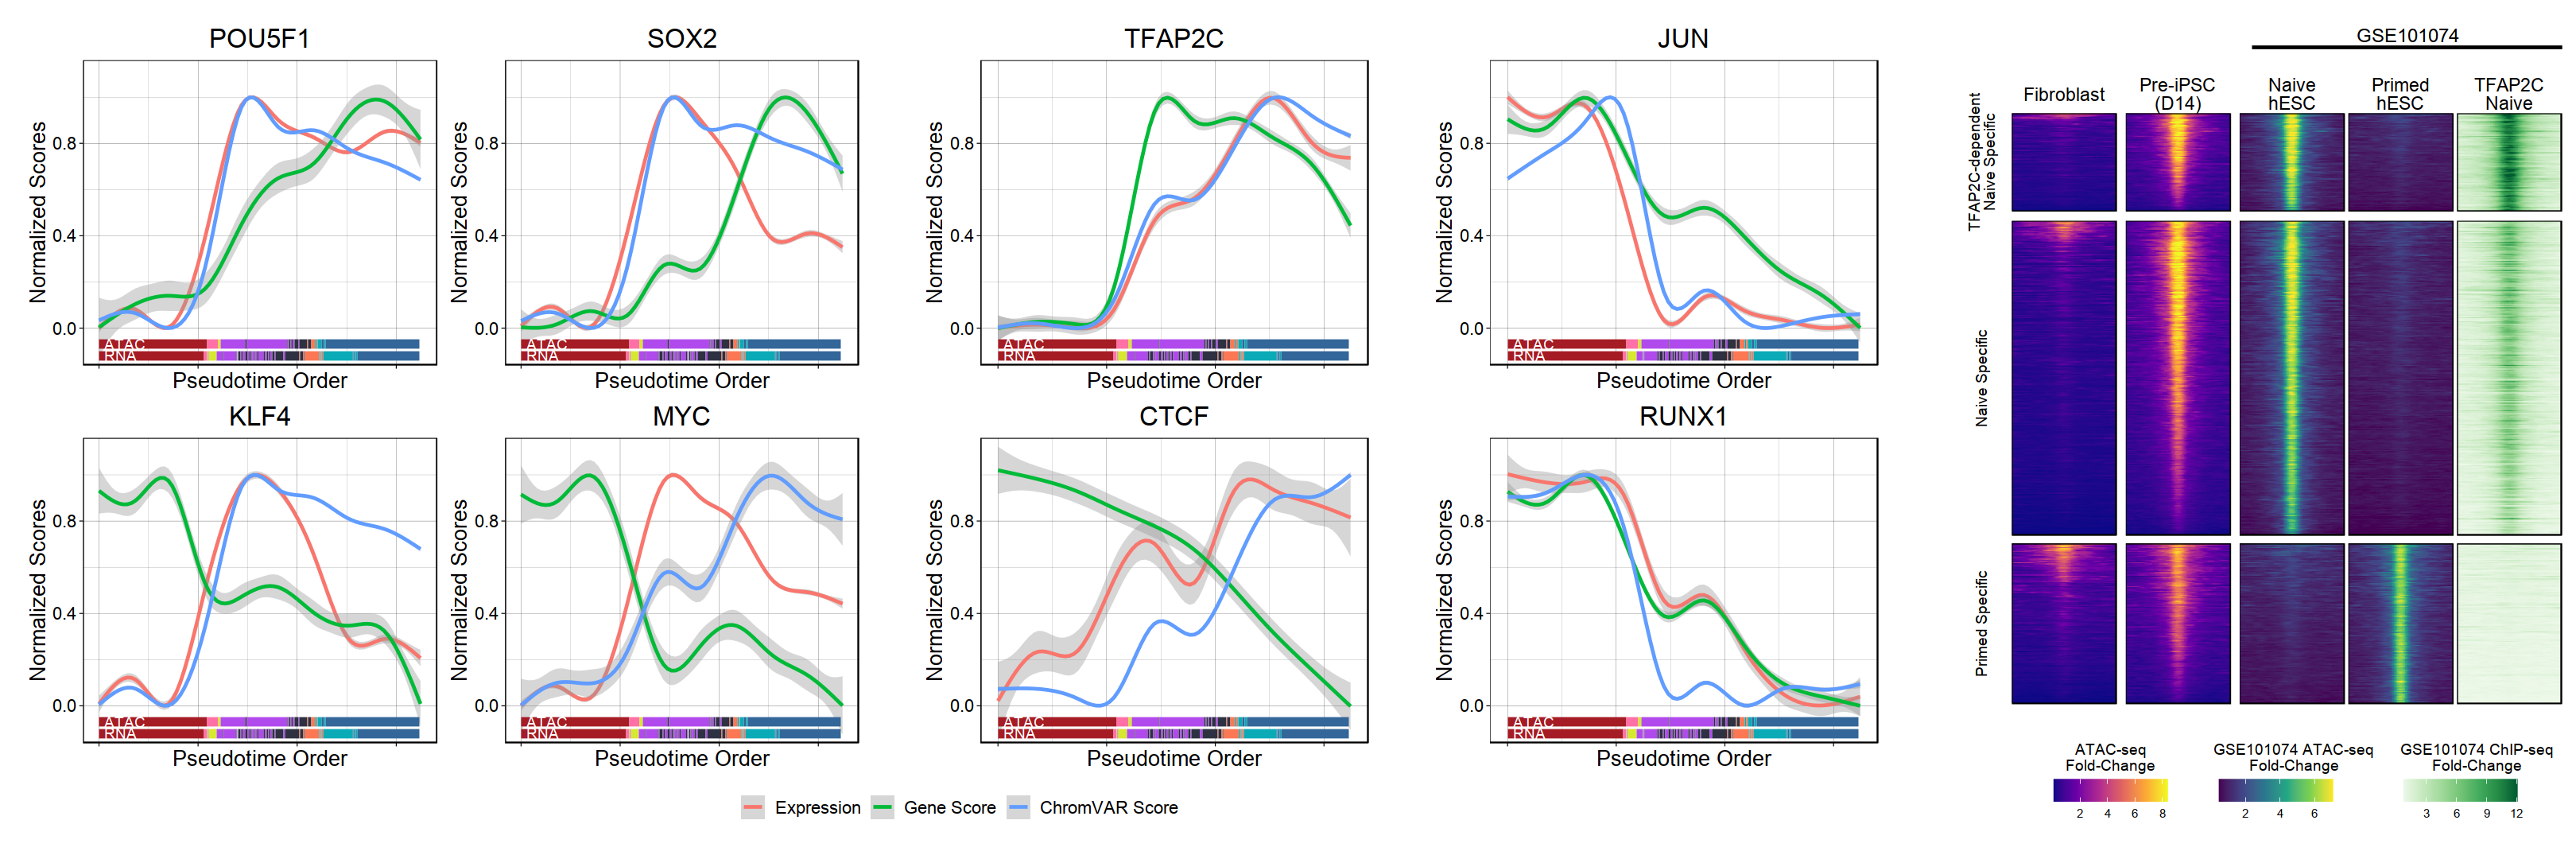

In [25]:
options(repr.plot.width = 27, repr.plot.height = 9)
row3

## Assemble Master

In [26]:
main_fig = wrap_plots(row1,
                      pseudotime_expr_chromvar,
                      row3,
                      heights = c(9,9,9))

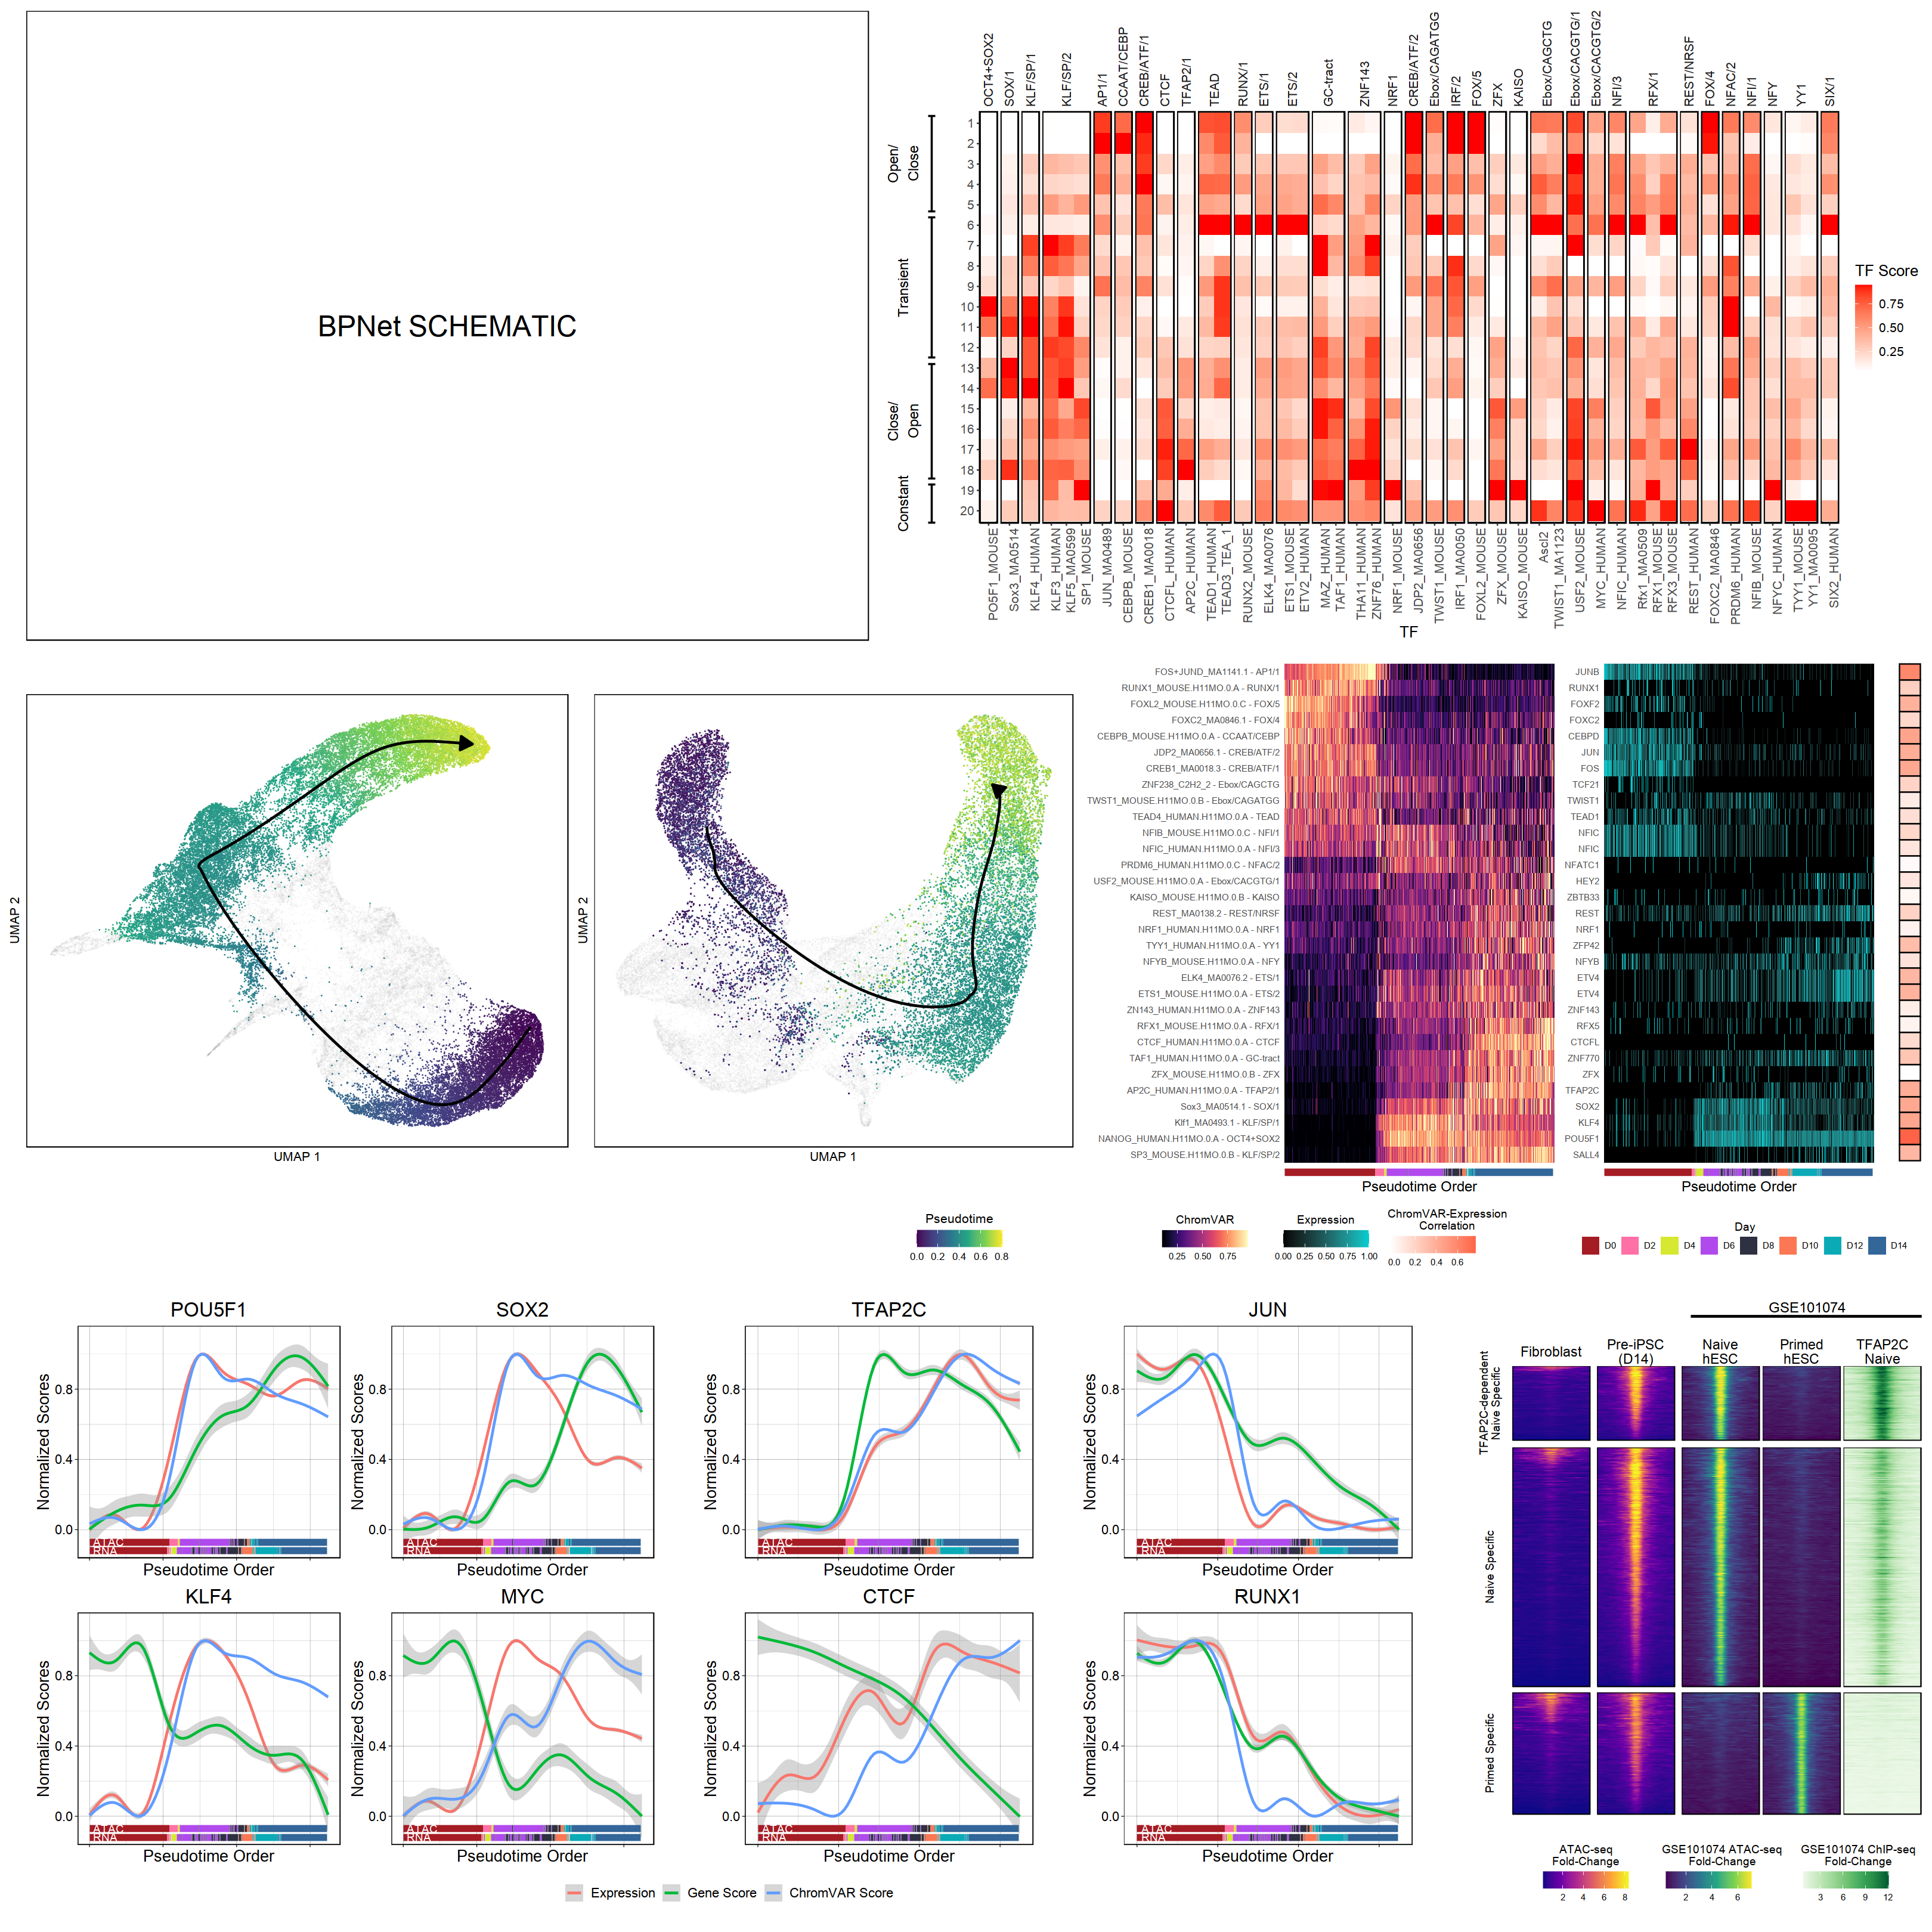

In [27]:
options(repr.plot.width = 27, repr.plot.height = 27)
main_fig

In [164]:
ggsave("tmp.pdf", main_fig, height=27, width=27)